In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

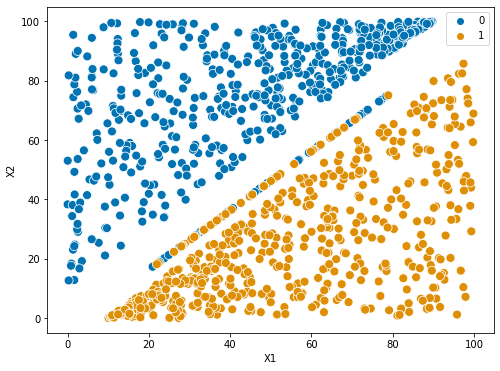

In [19]:
np.random.seed(1)
x1 = np.random.uniform(low=0.0, high=90.0, size=500)
y1 = np.random.uniform(low=x1+10, high=100.0, size=500)
x1_noise = np.random.uniform(low=20.0, high=80.0, size=50)
y1_noise = (5/4) + (x1_noise-5) + 0.1

x0 = np.random.uniform(low=10.0, high=100.0, size=500)
y0 = np.random.uniform(low=0.0, high=x0-10, size=500)
x0_noise = np.random.uniform(low=20.0, high=80.0, size=50)
y0_noise = (5/4) + (x0_noise-5) - 0.1

X1 = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x1_noise]), pd.DataFrame([x0]), pd.DataFrame([x0_noise])], axis=1).T
X2 = pd.concat([pd.DataFrame([y1]), pd.DataFrame([y1_noise]), pd.DataFrame([y0]), pd.DataFrame([y0_noise])], axis=1).T
X = pd.concat([X1, X2], axis=1)
X.columns = ['X1', 'X2']

y = np.concatenate([np.zeros(550), np.ones(550)]).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

plt.figure(figsize=(8,6))
sb.scatterplot(X['X1'], X['X2'], s=80, hue=y, palette='colorblind')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [20]:
def plot_svc(svc, X1, X2, y, h=0.01, pad=0.25, support_point=True):
    x_min, x_max = X1.min()-pad, X1.max()+pad
    y_min, y_max = X2.min()-pad, X2.max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    sb.scatterplot(X1, X2, s=70, hue=y, palette="colorblind")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    # Support vectors indicated in plot by vertical lines
    if support_point==True:
        sv = svc.support_vectors_
        plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=30, linewidths='0.1')
        print('Number of support vectors: {}'.format(svc.support_.size))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

Train Accuracy: 0.9673
Test  Accuracy: 0.9618
Number of support vectors: 58


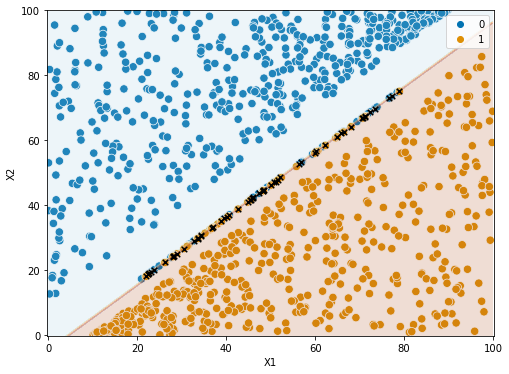

In [21]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

print('Train Accuracy: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test  Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))

plot_svc(svm, X['X1'], X['X2'], y, h=1)

Train Accuracy: 1.0000
Test  Accuracy: 1.0000
Number of support vectors: 22


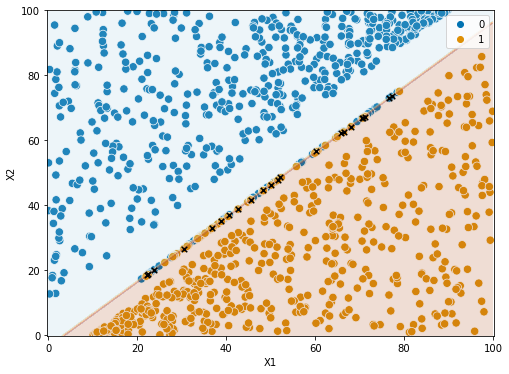

In [22]:
svm = SVC(kernel='linear', C=10)
svm.fit(X_train, y_train)

print('Train Accuracy: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test  Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))

plot_svc(svm, X['X1'], X['X2'], y, h=1)

Train Accuracy: 0.9455
Test  Accuracy: 0.9636
Number of support vectors: 63


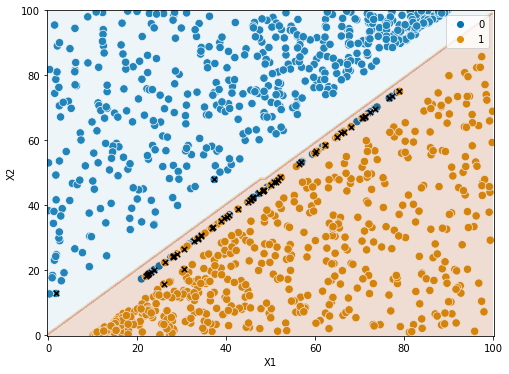

In [23]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(X_train, y_train)

print('Train Accuracy: {:.4f}'.format(svm.score(X_train, y_train)))
print('Test  Accuracy: {:.4f}'.format(svm.score(X_test, y_test)))

plot_svc(svm, X['X1'], X['X2'], y, h=1)

In [24]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.best_params_

{'C': 0.01}

In [25]:
for i in [0.01, 0.1, 1, 10, 100]:
    print('C = ', i)
    svm = SVC(kernel='linear', C=i)
    score = cross_validate(svm, X, y, cv=10, scoring=['accuracy', 'roc_auc'], return_train_score=True)
    print('Train Accuracy: {:.4f}'.format(np.mean(score['train_accuracy'])))
    print('Test  Accuracy: {:.4f}\n'.format(np.mean(score['test_accuracy'])))

C =  0.01
Train Accuracy: 0.9611
Test  Accuracy: 0.9545

C =  0.1
Train Accuracy: 0.9627
Test  Accuracy: 0.9545

C =  1
Train Accuracy: 0.9855
Test  Accuracy: 0.9545

C =  10
Train Accuracy: 1.0000
Test  Accuracy: 0.9545

C =  100
Train Accuracy: 1.0000
Test  Accuracy: 0.9545

